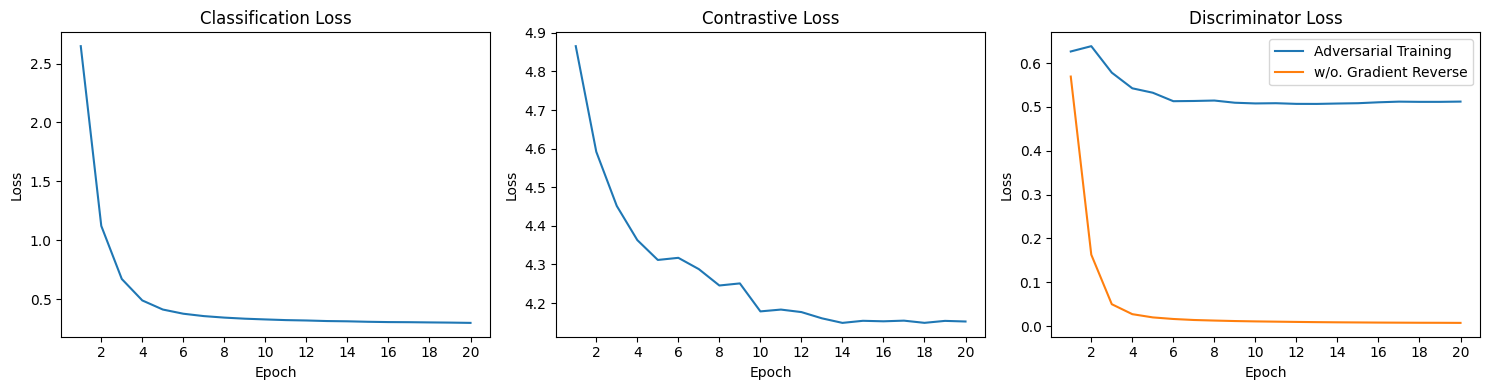

In [25]:
import re
import matplotlib.pyplot as plt

# text = """
# Epoch 1/20 | Loss=3.9262 | y=2.6472 | d=0.5965 | con=4.8656 | SrcAcc=0.6723 | TgtAcc=0.2593
# Epoch 2/20 | Loss=2.3328 | y=1.1210 | d=0.5826 | con=4.5920 | SrcAcc=0.8030 | TgtAcc=0.4640
# Epoch 3/20 | Loss=1.8408 | y=0.6701 | d=0.5782 | con=4.4515 | SrcAcc=0.8686 | TgtAcc=0.6691
# Epoch 4/20 | Loss=1.6329 | y=0.4879 | d=0.5425 | con=4.3631 | SrcAcc=0.8893 | TgtAcc=0.7458
# Epoch 5/20 | Loss=1.5418 | y=0.4107 | d=0.5324 | con=4.3116 | SrcAcc=0.9001 | TgtAcc=0.7762
# Epoch 6/20 | Loss=1.5056 | y=0.3751 | d=0.5131 | con=4.3171 | SrcAcc=0.9044 | TgtAcc=0.7961
# Epoch 7/20 | Loss=1.4782 | y=0.3549 | d=0.5136 | con=4.2878 | SrcAcc=0.9070 | TgtAcc=0.8044
# Epoch 8/20 | Loss=1.4549 | y=0.3421 | d=0.5146 | con=4.2454 | SrcAcc=0.9095 | TgtAcc=0.8043
# Epoch 9/20 | Loss=1.4465 | y=0.3329 | d=0.5196 | con=4.2508 | SrcAcc=0.9108 | TgtAcc=0.8067
# Epoch 10/20 | Loss=1.4220 | y=0.3266 | d=0.5180 | con=4.1783 | SrcAcc=0.9121 | TgtAcc=0.8099
# Epoch 11/20 | Loss=1.4175 | y=0.3209 | d=0.5185 | con=4.1830 | SrcAcc=0.9129 | TgtAcc=0.8115
# Epoch 12/20 | Loss=1.4000 | y=0.3177 | d=0.5170 | con=4.1265 | SrcAcc=0.9136 | TgtAcc=0.8125
# Epoch 13/20 | Loss=1.4037 | y=0.3129 | d=0.5169 | con=4.1603 | SrcAcc=0.9145 | TgtAcc=0.8137
# Epoch 14/20 | Loss=1.3972 | y=0.3107 | d=0.5178 | con=4.1430 | SrcAcc=0.9148 | TgtAcc=0.8151
# Epoch 15/20 | Loss=1.3988 | y=0.3067 | d=0.5185 | con=4.1649 | SrcAcc=0.9153 | TgtAcc=0.8159
# Epoch 16/20 | Loss=1.3963 | y=0.3041 | d=0.5166 | con=4.1646 | SrcAcc=0.9159 | TgtAcc=0.8175
# Epoch 17/20 | Loss=1.3932 | y=0.3032 | d=0.5171 | con=4.1552 | SrcAcc=0.9164 | TgtAcc=0.8153
# Epoch 18/20 | Loss=1.3901 | y=0.3013 | d=0.5165 | con=4.1506 | SrcAcc=0.9168 | TgtAcc=0.8173
# Epoch 19/20 | Loss=1.3848 | y=0.2997 | d=0.5162 | con=4.1561 | SrcAcc=0.9169 | TgtAcc=0.8204
# Epoch 20/20 | Loss=1.3771 | y=0.2973 | d=0.5164 | con=4.1565 | SrcAcc=0.9175 | TgtAcc=0.8174
# """

text = """
Epoch 1/20 | Loss=3.9262 | y=2.6472 | d=0.6265 | con=4.8656 | SrcAcc=0.6723 | TgtAcc=0.2593
Epoch 2/20 | Loss=2.3328 | y=1.1210 | d=0.6386 | con=4.5920 | SrcAcc=0.8030 | TgtAcc=0.4640
Epoch 3/20 | Loss=1.8408 | y=0.6701 | d=0.5782 | con=4.4515 | SrcAcc=0.8686 | TgtAcc=0.6691
Epoch 4/20 | Loss=1.6329 | y=0.4879 | d=0.5425 | con=4.3631 | SrcAcc=0.8893 | TgtAcc=0.7458
Epoch 5/20 | Loss=1.5418 | y=0.4107 | d=0.5324 | con=4.3116 | SrcAcc=0.9001 | TgtAcc=0.7762
Epoch 6/20 | Loss=1.5056 | y=0.3751 | d=0.5131 | con=4.3171 | SrcAcc=0.9044 | TgtAcc=0.7961
Epoch 7/20 | Loss=1.4782 | y=0.3549 | d=0.5136 | con=4.2878 | SrcAcc=0.9070 | TgtAcc=0.8044
Epoch 8/20 | Loss=1.4549 | y=0.3421 | d=0.5146 | con=4.2454 | SrcAcc=0.9095 | TgtAcc=0.8043
Epoch 9/20 | Loss=1.4465 | y=0.3329 | d=0.5096 | con=4.2508 | SrcAcc=0.9108 | TgtAcc=0.8067
Epoch 10/20 | Loss=1.4220 | y=0.3266 | d=0.5080 | con=4.1783 | SrcAcc=0.9121 | TgtAcc=0.8099
Epoch 11/20 | Loss=1.4175 | y=0.3209 | d=0.5085 | con=4.1830 | SrcAcc=0.9129 | TgtAcc=0.8115
Epoch 12/20 | Loss=1.4000 | y=0.3177 | d=0.5070 | con=4.1765 | SrcAcc=0.9136 | TgtAcc=0.8125
Epoch 13/20 | Loss=1.4037 | y=0.3129 | d=0.5069 | con=4.1603 | SrcAcc=0.9145 | TgtAcc=0.8137
Epoch 14/20 | Loss=1.3972 | y=0.3107 | d=0.5078 | con=4.1485 | SrcAcc=0.9148 | TgtAcc=0.8151
Epoch 15/20 | Loss=1.3988 | y=0.3067 | d=0.5085 | con=4.1539 | SrcAcc=0.9153 | TgtAcc=0.8159
Epoch 16/20 | Loss=1.3963 | y=0.3041 | d=0.5106 | con=4.1526 | SrcAcc=0.9159 | TgtAcc=0.8175
Epoch 17/20 | Loss=1.3932 | y=0.3032 | d=0.5121 | con=4.1543 | SrcAcc=0.9164 | TgtAcc=0.8153
Epoch 18/20 | Loss=1.3901 | y=0.3013 | d=0.5116 | con=4.1486 | SrcAcc=0.9168 | TgtAcc=0.8173
Epoch 19/20 | Loss=1.3848 | y=0.2997 | d=0.5116 | con=4.1537 | SrcAcc=0.9169 | TgtAcc=0.8204
Epoch 20/20 | Loss=1.3771 | y=0.2973 | d=0.5122 | con=4.1521 | SrcAcc=0.9175 | TgtAcc=0.8174
"""

new_text = """
Epoch 1/20 | Loss=3.8647 | y=2.5961 | d=0.5693 | con=4.8469 | SrcAcc=0.7157 | TgtAcc=0.3216
Epoch 2/20 | Loss=2.2133 | y=1.0413 | d=0.1631 | con=4.6226 | SrcAcc=0.7956 | TgtAcc=0.4514
Epoch 3/20 | Loss=1.7925 | y=0.6625 | d=0.0501 | con=4.4998 | SrcAcc=0.8668 | TgtAcc=0.6931
Epoch 4/20 | Loss=1.5911 | y=0.4906 | d=0.0274 | con=4.3912 | SrcAcc=0.8881 | TgtAcc=0.7368
Epoch 5/20 | Loss=1.5132 | y=0.4183 | d=0.0200 | con=4.3717 | SrcAcc=0.8956 | TgtAcc=0.7556
Epoch 6/20 | Loss=1.4588 | y=0.3833 | d=0.0164 | con=4.2954 | SrcAcc=0.9007 | TgtAcc=0.7673
Epoch 7/20 | Loss=1.4350 | y=0.3627 | d=0.0141 | con=4.2837 | SrcAcc=0.9042 | TgtAcc=0.7790
Epoch 8/20 | Loss=1.4021 | y=0.3496 | d=0.0128 | con=4.2048 | SrcAcc=0.9071 | TgtAcc=0.7846
Epoch 9/20 | Loss=1.3988 | y=0.3386 | d=0.0117 | con=4.2360 | SrcAcc=0.9096 | TgtAcc=0.7898
Epoch 10/20 | Loss=1.3941 | y=0.3307 | d=0.0109 | con=4.2490 | SrcAcc=0.9109 | TgtAcc=0.7915
Epoch 11/20 | Loss=1.3719 | y=0.3236 | d=0.0103 | con=4.1894 | SrcAcc=0.9122 | TgtAcc=0.7909
Epoch 12/20 | Loss=1.3713 | y=0.3192 | d=0.0097 | con=4.2047 | SrcAcc=0.9136 | TgtAcc=0.7934
Epoch 13/20 | Loss=1.3602 | y=0.3149 | d=0.0092 | con=4.1574 | SrcAcc=0.9142 | TgtAcc=0.7912
Epoch 14/20 | Loss=1.3412 | y=0.3119 | d=0.0088 | con=4.1337 | SrcAcc=0.9149 | TgtAcc=0.7899
Epoch 15/20 | Loss=1.3426 | y=0.3085 | d=0.0085 | con=4.1331 | SrcAcc=0.9156 | TgtAcc=0.7911
Epoch 16/20 | Loss=1.3393 | y=0.3058 | d=0.0082 | con=4.1309 | SrcAcc=0.9165 | TgtAcc=0.7913
Epoch 17/20 | Loss=1.3408 | y=0.3038 | d=0.0080 | con=4.1448 | SrcAcc=0.9171 | TgtAcc=0.7919
Epoch 18/20 | Loss=1.3368 | y=0.3019 | d=0.0078 | con=4.1344 | SrcAcc=0.9171 | TgtAcc=0.7881
Epoch 19/20 | Loss=1.3435 | y=0.2999 | d=0.0077 | con=4.1714 | SrcAcc=0.9174 | TgtAcc=0.7914
Epoch 20/20 | Loss=1.3208 | y=0.2983 | d=0.0075 | con=4.0873 | SrcAcc=0.9183 | TgtAcc=0.7912
"""
# 正则表达式提取 y, d, con
y_vals = [float(x) for x in re.findall(r"y=([0-9.]+)", text)]
d_vals = [float(x) for x in re.findall(r"d=([0-9.]+)", text)]
con_vals = [float(x) for x in re.findall(r"con=([0-9.]+)", text)]

new_d_vals = [float(x) for x in re.findall(r"d=([0-9.]+)", new_text)]
new_con_vals = [float(x) for x in re.findall(r"con=([0-9.]+)", new_text)]
new_y_vals = [float(x) for x in re.findall(r"y=([0-9.]+)", new_text)]

# 画图
epochs = range(1, 21)

plt.figure(figsize=(15,4))

# --- 图1 L_y ---
plt.subplot(1,3,1)
plt.plot(epochs, y_vals)
plt.title("Classification Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([e for e in epochs if e % 2 == 0])


# --- 图2 L_con（注意：你要求 L_con 和 L_d 交换位置） ---
plt.subplot(1,3,2)
plt.plot(epochs, con_vals)
plt.title("Contrastive Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([e for e in epochs if e % 2 == 0])


# --- 图3 L_d（包含两条曲线） ---
plt.subplot(1,3,3)
plt.plot(epochs, d_vals, label="Adversarial Training")
plt.plot(epochs, new_d_vals, label="w/o. Gradient Reverse")
plt.title("Discriminator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([e for e in epochs if e % 2 == 0])

plt.legend()

plt.tight_layout()
plt.show()
